In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")


In [ ]:
df=pd.read_csv("Position_Salaries.csv")

In [ ]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [ ]:
X=df[["Level"]]
y=df["Salary"]

**model building**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model1=LinearRegression()
model1.fit(X,y)
y_pred=model1.predict(X)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
def model_performance(y_actual,y_pred):
  r2=r2_score(y_actual,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_actual,y_pred))
  print("R2 Score:{}|RMSE:{}".format(round(r2,2),round(RMSE,2)))

In [ ]:
model_performance(y,y_pred)

R2 Score:0.67|RMSE:163388.74


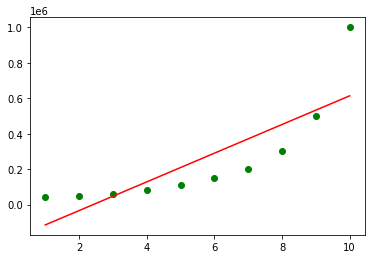

In [ ]:
plt.scatter(X,y,color="green")#actual value
plt.plot(X,y_pred,color="red")# predicted values


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
reg1=PolynomialFeatures(degree=2)
X_poly=reg1.fit_transform(X)

In [ ]:
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [ ]:
model2=LinearRegression()
model2.fit(X_poly,y)
y_pred_poly2=model2.predict(X_poly)

In [ ]:
model_performance(y,y_pred_poly2)

R2 Score:0.92|RMSE:82212.12


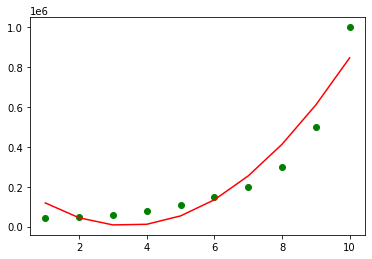

In [ ]:
plt.scatter(X,y,color="green")#actual value
plt.plot(X,y_pred_poly2,color="red")# predicted values


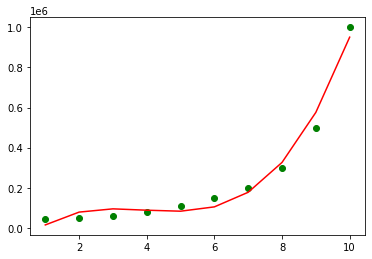

In [ ]:
reg2=PolynomialFeatures(degree=3)
X_poly=reg2.fit_transform(X)
model3=LinearRegression()
model3.fit(X_poly,y)
y_pred_poly3=model3.predict(X_poly)
plt.scatter(X,y,color="green")#actual value
plt.plot(X,y_pred_poly3,color="red")# predicted values



R2 Score:1.0|RMSE:14503.23


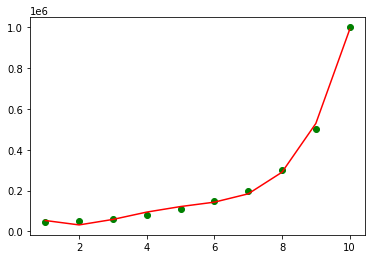

In [ ]:
reg3=PolynomialFeatures(degree=4)
X_poly=reg3.fit_transform(X)
model4=LinearRegression()
model4.fit(X_poly,y)
y_pred_poly4=model4.predict(X_poly)
plt.scatter(X,y,color="green")#actual value
plt.plot(X,y_pred_poly4,color="red")# predicted values
model_performance(y,y_pred_poly4)


In [ ]:
model_performance(y,y_pred_poly4)

R2 Score:1.0|RMSE:14503.23


**predicting salary for level 6.5**

In [ ]:
# assume=level=6.5
model1.predict([[6.5]])

array([330378.78787879])

In [ ]:
#degree=2
model2.predict(reg1.fit_transform([[6.5]]))

array([189498.10606061])

In [ ]:
#degree=3
model3.predict(reg2.fit_transform([[6.5]]))

array([133259.46969697])

In [ ]:
#degree=4
model4.predict(reg3.fit_transform([[6.5]]))

array([158862.45265155])